# **Tugas Besar Tahap 2 Pembelajaran Mesin**

Afrizal Syahruluddin Yusuf    (1301194288)

Ni Made Dwipadini Puspitarini (1301194141)


#**Import Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

##**Import Dataset**

In [ ]:
# import dataset dari google drive
!gdown --id 1hsffcmhRqtm6HuXJBl_JrIqNT8R7smq7
!gdown --id 1qqc4b4Q-CNHyFzJPBQ_hCLD9LiY4dBjU

Downloading...
From: https://drive.google.com/uc?id=1hsffcmhRqtm6HuXJBl_JrIqNT8R7smq7
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:01<00:00, 14.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qqc4b4Q-CNHyFzJPBQ_hCLD9LiY4dBjU
To: /content/kendaraan_test (1).csv
100% 2.31M/2.31M [00:00<00:00, 151MB/s]


In [ ]:
# membaca dataset
df_train = pd.read_csv('kendaraan_train.csv')
df_test = pd.read_csv('kendaraan_test (1).csv')

# **Eksplorasi dan Persiapan Data**


# **Data Train**

In [ ]:
# menampilkan 5 data pertama
df_train.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
# mengecek ukuran baris dan kolom
df_train.shape

(285831, 12)

In [ ]:
# mengecek nama-nama kolom, tipe data masing-masing kolom, beserta kelengkapan datanya
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
# mengecek jumlah missing value pada masing-masing kolom
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

**Preprocessing Data**

In [ ]:
# drop kolom id 
df_train = df_train.drop(['id'], axis = 1)

In [ ]:
# mencari nilai modus untuk kolom Jenis Kelamin, Kode Daerah, Sudah Asuransi, Umur Kendaraan, Kendaraan Rusak, dan Kanal Penjualan
df_train.iloc[:,[0, 3, 4, 5, 6, 8]].mode()

,Jenis_Kelamin,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Kanal_Penjualan
0,Pria,28.0,0.0,1-2 Tahun,Pernah,152.0


Handling Missing Value

In [ ]:
# mengganti nilai null pada kolom df_train['Umur'] dengan nilai rata-ratanya 
df_train['Umur'].fillna(df_train['Umur'].mean(), inplace = True)

# mengganti nilai null pada kolom df_train['Premi'] dengan nilai rata-ratanya 
df_train['Premi'].fillna(df_train['Premi'].mean(), inplace = True)

# mengganti nilai null pada kolom df_train['Lama Berlangganan'] dengan nilai rata-ratanya 
df_train['Lama_Berlangganan'].fillna(df_train['Lama_Berlangganan'].mean(), inplace = True)

# mengganti nilai null pada kolom df_train['SIM'] dengan 1
df_train['SIM'].fillna(1, inplace = True)

# mengganti nilai null pada kolom df_train['Jenis Kelamin'] dengan nilai modusnya
df_train['Jenis_Kelamin'].fillna('Pria', inplace = True)

# mengganti nilai null pada kolom df_train['Sudah Asuransi'] dengan nilai modusnya
df_train['Sudah_Asuransi'].fillna(0, inplace = True)

# mengganti nilai null pada kolom df_train['Kode Daerah'] dengan nilai modusnya
df_train['Kode_Daerah'].fillna(28, inplace = True)

# mengganti nilai null pada kolom df_train['Umur Kendaraan'] dengan nilai modusnya 
df_train['Umur_Kendaraan'].fillna('1-2 Tahun', inplace = True)

# mengganti nilai null pada kolom df_train['Kendaraan Rusak'] dengan nilai modusnya
df_train['Kendaraan_Rusak'].fillna('Pernah', inplace = True)

# mengganti nilai null pada kolom df_train['Kanal Penjualan'] dengan nilai modusnya
df_train['Kanal_Penjualan'].fillna(152, inplace = True)

In [ ]:
# mengecek jumlah missing value pada masing-masing kolom
df_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# export dataset yang sudah dilakukan handling missing value
df_train.to_csv('kendaraan_train_no_missing_value.csv', index = False)

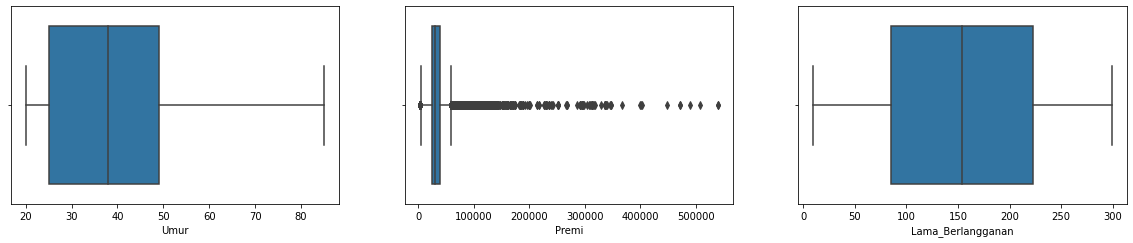

In [ ]:
# menampilkan boxplot semua kolom numerik untuk melihat terdapat outliers atau tidak
df_num1 = df_train.iloc[:, [0, 1, 7, 9]]
plt.figure(figsize = (20, 8))
for i in range(1, len(df_num1.columns)):
  plt.subplot(2, 3, i)
  sns.boxplot(df_num1.columns[i], data = df_num1)

Handling Outlier

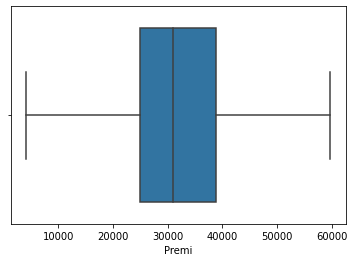

In [ ]:
# capping outliers kolom df_train['Premi'] menggunakan nilai lower bound dan upper bound
Q1 = df_train['Premi'].quantile(0.25)
Q3 = df_train['Premi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

for i in range(len(df_train['Premi'])):
   if df_train['Premi'][i] < lower_bound:
     df_train['Premi'][i] = lower_bound
   if df_train['Premi'][i] > upper_bound:
     df_train['Premi'][i] = upper_bound

# menampilkan boxplot kolom df_train['Premi] setelah dilakukan capping outliers
sns.boxplot(x = 'Premi', data = df_train)
plt.show()

In [ ]:
# export dataset yang sudah dilakukan handling outlier
df_train.to_csv('kendaraan_train_no_missing_value_and_outlier.csv', index = False)

**Scalling Data**


In [ ]:
# melakukan mapping dan mengubah kolom bertipe data object menjadi integer
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].map({'Pria': 1 , 'Wanita': 0}).astype(int)
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].map({'< 1 Tahun': 0 , '> 2 Tahun' : 2, '1-2 Tahun' : 1}).astype(int)
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].map({'Tidak': 0 , 'Pernah': 1}).astype(int)

df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,1,21.0,1.0,46.0,1.0,0,0,32733.0,160.0,119.0,0
3,0,58.0,1.0,48.0,0.0,1,0,4055.0,124.0,63.0,0
4,1,50.0,1.0,35.0,0.0,2,1,34857.0,88.0,194.0,0


In [ ]:
# scaling data dengan metode z-score
for cols in df_train.columns:
  if cols != "Tertarik" :
    df_train[cols] = (df_train[cols] - df_train[cols].mean()) / df_train[cols].std()   

df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,-1.136620,-0.584494,0.045248,0.504182,1.137494,-1.124496,-1.060574,-0.157584,0.709303,-0.701860,0
1,0.879798,0.605069,0.045248,0.968525,-0.879123,2.449372,0.942882,-0.310969,-1.587901,0.045499,0
2,0.879798,-1.179276,0.045248,1.510259,1.137494,-1.124496,-1.060574,0.166115,0.858715,-0.432321,0
3,-1.136620,1.265937,0.045248,1.665040,-0.879123,0.662438,-1.060574,-1.807319,0.186362,-1.118421,0
4,0.879798,0.737242,0.045248,0.658963,-0.879123,2.449372,0.942882,0.312275,-0.485990,0.486564,0


In [ ]:
# export dataset yang sudah dilakukan scaling data
df_train.to_csv('kendaraan_train_clean_and_scaled.csv', index = False)

Data Modelling

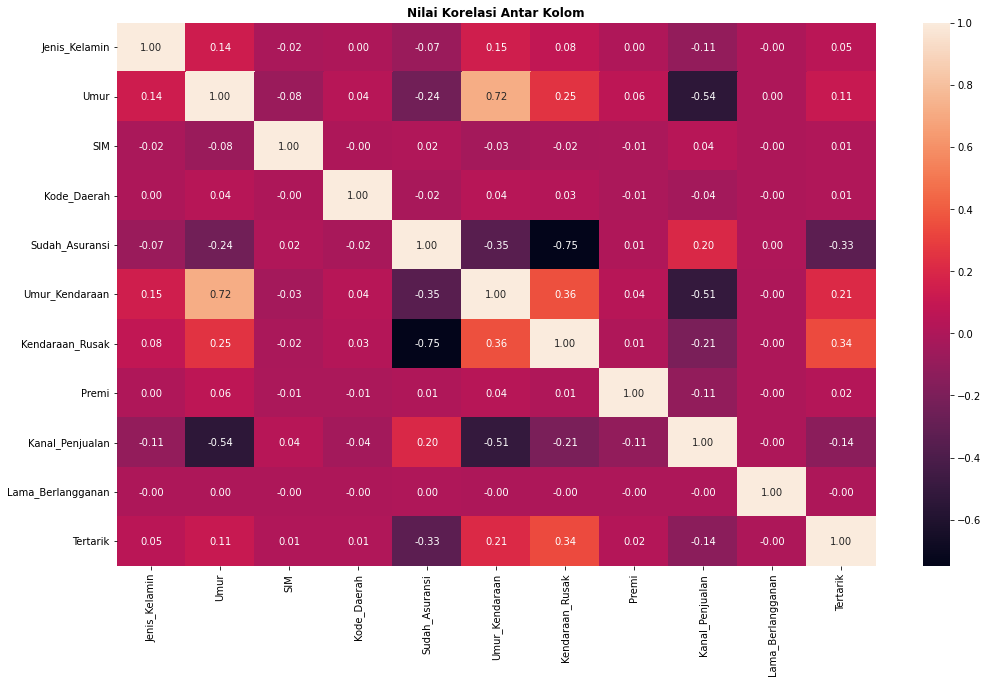

In [ ]:
# Heatmap
plt.figure(figsize=(17, 10))
sns.heatmap(data = df_train.corr(), annot = True, fmt='.2f').set_title('Nilai Korelasi Antar Kolom', weight = 'bold')
plt.show()

# **Data Test**

In [ ]:
# menampilkan 5 data pertama
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
# mengecek ukuran baris dan kolom
df_test.shape

(47639, 11)

In [ ]:
# mengecek nama-nama kolom, tipe data masing-masing kolom, beserta kelengkapan datanya
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
# mengecek jumlah missing value pada masing-masing kolom
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

**Scalling Data**

In [ ]:
# melakukan mapping dan mengubah kolom bertipe data object menjadi integer
df_test['Jenis_Kelamin'] = df_test['Jenis_Kelamin'].map({'Pria': 1 , 'Wanita': 0}).astype(int)
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].map({'< 1 Tahun': 0 , '> 2 Tahun' : 2, '1-2 Tahun' : 1}).astype(int)
df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].map({'Tidak': 0 , 'Pernah': 1}).astype(int)

df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0


In [ ]:
# scaling data dengan metode z-score
for cols in df_test.columns:
  if cols != "Tertarik" :
    df_test[cols] = (df_test[cols] - df_test[cols].mean()) / df_test[cols].std()    
    
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,-1.090120,0.655004,0.045633,-1.387348,-0.918514,0.692510,0.990733,0.938622,-1.591142,-0.112952,0
1,0.917311,-1.081463,0.045633,1.564212,1.088692,-1.070649,-1.009332,0.516956,0.735182,1.034795,0
2,0.917311,-0.952836,0.045633,0.126273,1.088692,-1.070649,-1.009332,4.587962,0.735182,-1.105275,0
3,0.917311,0.462063,0.045633,-1.387348,1.088692,0.692510,-1.009332,0.324021,0.218221,-1.440035,0
4,0.917311,-0.245386,0.045633,-0.252132,-0.918514,0.692510,0.990733,-0.210487,0.735182,0.891326,0


In [ ]:
# export dataset yang sudah dilakukan scaling data
df_test.to_csv('kendaraan_test_scaled.csv', index = False)

**Data Modelling**

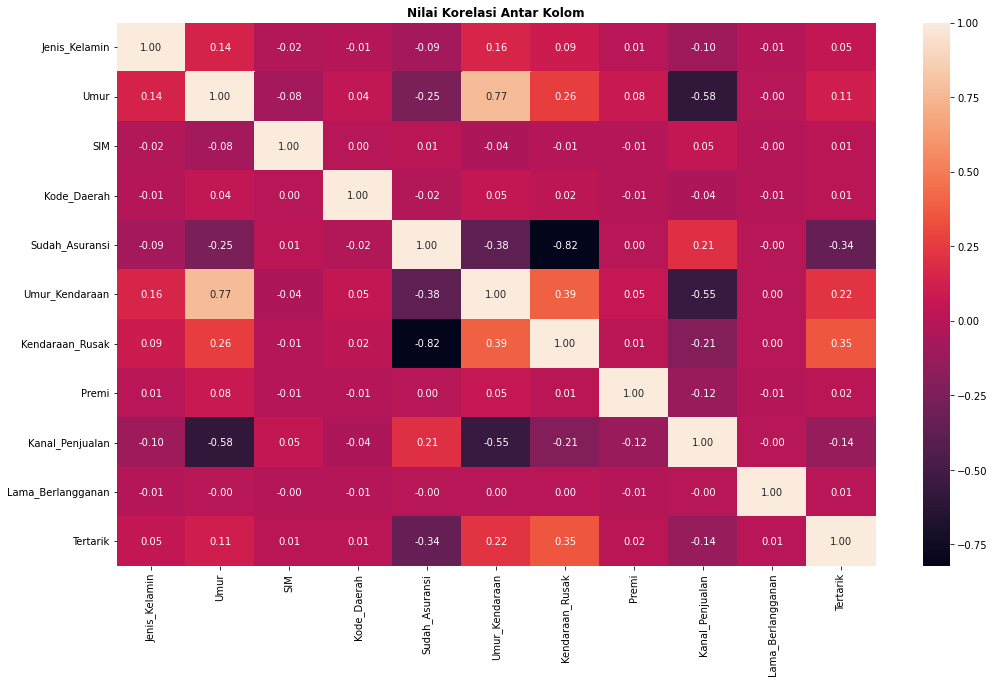

In [ ]:
# Heatmap
plt.figure(figsize=(17, 10))
sns.heatmap(data = df_test.corr(), annot = True, fmt='.2f').set_title('Nilai Korelasi Antar Kolom', weight = 'bold')
plt.show()

# **Pemodelan Classification**

**Pembagian Dataset**

In [ ]:
# membagi dataset df_train menjadi x_train dan y_train
x_train = df_train.drop("Tertarik", axis = 1)
y_train = df_train["Tertarik"]

# membagi dataset df_test menjadi x_test dan y_test
x_test = df_test.drop("Tertarik", axis = 1)
y_test = df_test["Tertarik"]

**Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[36986  4792]
 [ 4115  1746]]
Accuracy: 0.8130313398685951


**K-Nearest Neighbor**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[39816  1962]
 [ 4884   977]]
Accuracy: 0.8562942127248683


**Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[41053   725]
 [ 5463   398]]
Accuracy: 0.8701064254077542


**Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[24794 16984]
 [  145  5716]]
Accuracy: 0.6404416549465773


**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[41708    70]
 [ 5817    44]]
Accuracy: 0.8764247780180104


# **Model Evaluation for Logistic Regression**

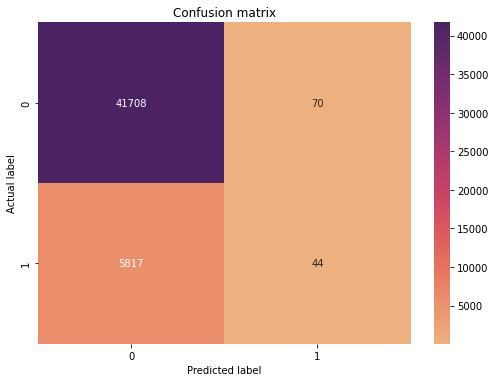

Accuracy: 87.64247780180105%
Precission: 38.59649122807017%
Recall: 0.7507251322299948%


In [ ]:
# memvisualisasikan confusion matrix dengan heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)*100}%")
print(f"Precission: {metrics.precision_score(y_test, y_pred)*100}%")
print(f"Recall: {metrics.recall_score(y_test, y_pred)*100}%")

In [ ]:
# print classification report untuk model logistic regression
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.39      0.01      0.01      5861

    accuracy                           0.88     47639
   macro avg       0.63      0.50      0.47     47639
weighted avg       0.82      0.88      0.82     47639



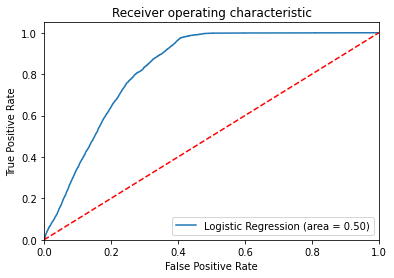

In [ ]:
# memvisualisasikan kinerja model dalam bentuk grafik menggunakan AUC-ROC curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Eksperimen dengan Oversampling Dataset dan Train Test Split**

0    250825
1     35006
Name: Tertarik, dtype: int64


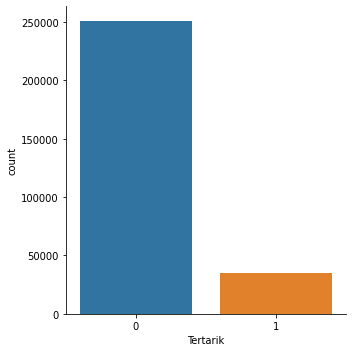

In [ ]:
# memvisualisasikan jumlah data tertarik dan tidak tertarik
print(df_train['Tertarik'].value_counts())
sns.catplot(x = 'Tertarik', data = df_train, kind = 'count')

In [ ]:
# membagi df_train menjadi dataset x dan dataset y 
x = df_train.drop("Tertarik", axis = 1)
y = df_train["Tertarik"]

# oversampling dataset tersebut agar menjadi lebih seimbang
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

# membagi dataset menggunakan train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

**Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[55562  7260]
 [ 6379 56212]]
Accuracy: 0.8912473188584915


**K-Nearest Neighbor**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[47183 15639]
 [ 1835 60756]]
Accuracy: 0.860668351765766


**Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[56198  6624]
 [ 4283 58308]]
Accuracy: 0.913031344437977


**Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[36883 25939]
 [ 1426 61165]]
Accuracy: 0.781800929728178


**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[36910 25912]
 [ 1459 61132]]
Accuracy: 0.7817530877979156


# **Model Evaluation for Random Forest Classifier**

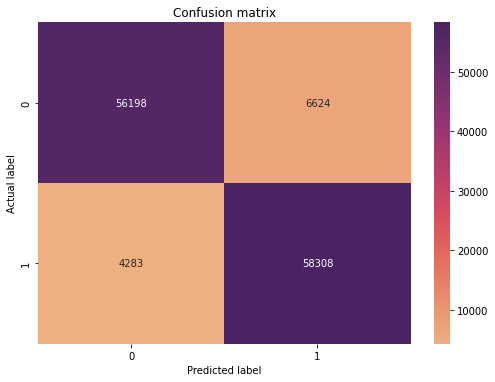

In [ ]:
# memvisualisasikan confusion matrix dengan heatmap
y_pred = rfc.predict(x_test)
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)*100}%")
print(f"Precission: {metrics.precision_score(y_test, y_pred)*100}%")
print(f"Recall: {metrics.recall_score(y_test, y_pred)*100}%")
print(classification_report(y_test, y_pred))

Accuracy: 91.30313444379769%
Precission: 89.79855849196082%
Recall: 93.15716317042386%
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     62822
           1       0.90      0.93      0.91     62591

    accuracy                           0.91    125413
   macro avg       0.91      0.91      0.91    125413
weighted avg       0.91      0.91      0.91    125413



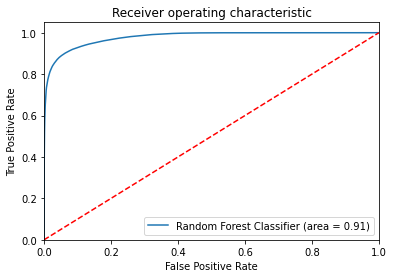

In [ ]:
# memvisualisasikan kinerja model dalam bentuk grafik menggunakan AUC-ROC curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()